# Testing Schedulers

## Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from baseSetterHelper import setAllSeeds, setDeterministic, computeAccu
from trainerHelper import modelTrainer
from plottingHelper import plotTrainingLoss, plotAccuracy, show_examples
from dataLoaderHelper import getDataLoadersMNIST

## Settings Parameter

In [3]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
setAllSeeds(RANDOM_SEED)
setDeterministic()

## Data Loader and Data Intialization

In [5]:
trainLoader, validLoader, testLoader = getDataLoadersMNIST(
    batchSize=BATCH_SIZE,
    validFraction=0.1)

# Checking the dataset
for images, labels in trainLoader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Model

In [6]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, numFeatures, numClasses, dropProba, numHidden1, numHidden2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(numFeatures, numHidden1, bias=False),
            torch.nn.BatchNorm1d(numHidden1),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # 2nd hidden layer
            torch.nn.Linear(numHidden1, numHidden2, bias=False),
            torch.nn.BatchNorm1d(numHidden2),
            torch.nn.ReLU(),
            torch.nn.Dropout(abs(dropProba-0.2)),
            # output layer
            torch.nn.Linear(numHidden2, numClasses)
        )

    def forward(self, x):
        logits = self.my_network(x)
        return logits

## Model Initialization for scheduler using valid Acc

In [7]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.0,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


### Training

In [8]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    schedulerOn='validAcc')

Epoch:001/050 | Batch:000/210 |  Cost:2.3787
Epoch:001/050 | Batch:050/210 |  Cost:0.4761
Epoch:001/050 | Batch:100/210 |  Cost:0.4000
Epoch:001/050 | Batch:150/210 |  Cost:0.2757
Epoch:001/050 | Batch:200/210 |  Cost:0.2539
Epoch:001/050 |
Train Acc 95.0688%
Val Acc   96.2000%
Time Taken: 0.56 min
Epoch:002/050 | Batch:000/210 |  Cost:0.2286
Epoch:002/050 | Batch:050/210 |  Cost:0.1676
Epoch:002/050 | Batch:100/210 |  Cost:0.1644
Epoch:002/050 | Batch:150/210 |  Cost:0.2145
Epoch:002/050 | Batch:200/210 |  Cost:0.2066
Epoch:002/050 |
Train Acc 96.8601%
Val Acc   97.1833%
Time Taken: 0.89 min
Epoch:003/050 | Batch:000/210 |  Cost:0.1292
Epoch:003/050 | Batch:050/210 |  Cost:0.1413
Epoch:003/050 | Batch:100/210 |  Cost:0.1137
Epoch:003/050 | Batch:150/210 |  Cost:0.1599
Epoch:003/050 | Batch:200/210 |  Cost:0.1263
Epoch:003/050 |
Train Acc 97.5688%
Val Acc   97.0833%
Time Taken: 1.30 min
Epoch:004/050 | Batch:000/210 |  Cost:0.1074
Epoch:004/050 | Batch:050/210 |  Cost:0.0678
Epoch:004/

### Plotting

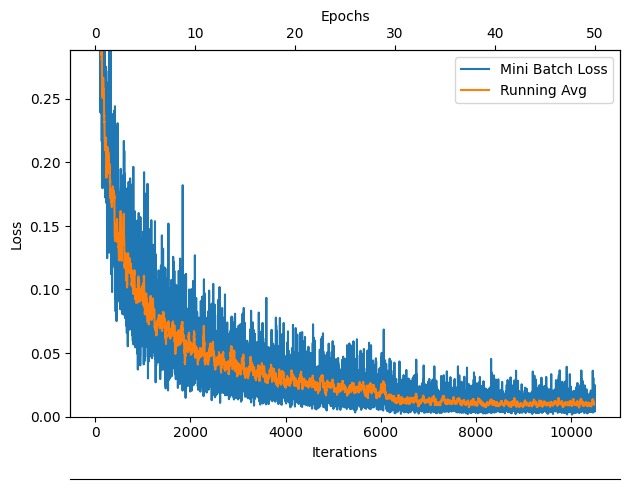

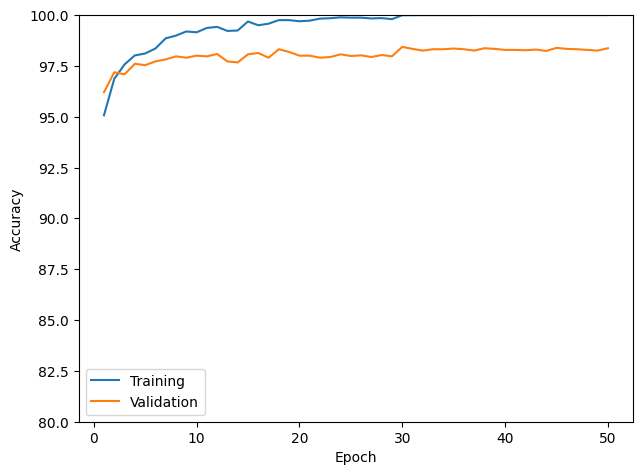

In [9]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## Model Initialization for schedulerOn with miniBatchLoss

In [10]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.5,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)


### Training

In [11]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    schedulerOn='miniBatchLoss')

Epoch:001/050 | Batch:000/210 |  Cost:2.3679
Epoch:001/050 | Batch:050/210 |  Cost:0.9251
Epoch:001/050 | Batch:100/210 |  Cost:0.7046
Epoch:001/050 | Batch:150/210 |  Cost:0.6538
Epoch:001/050 | Batch:200/210 |  Cost:0.5276
Epoch:001/050 |
Train Acc 91.6220%
Val Acc   93.3667%
Time Taken: 0.29 min
Epoch:002/050 | Batch:000/210 |  Cost:0.5132
Epoch:002/050 | Batch:050/210 |  Cost:0.4841
Epoch:002/050 | Batch:100/210 |  Cost:0.6080
Epoch:002/050 | Batch:150/210 |  Cost:0.5526
Epoch:002/050 | Batch:200/210 |  Cost:0.4468
Epoch:002/050 |
Train Acc 93.2106%
Val Acc   94.3167%
Time Taken: 0.59 min
Epoch:003/050 | Batch:000/210 |  Cost:0.3181
Epoch:003/050 | Batch:050/210 |  Cost:0.4124
Epoch:003/050 | Batch:100/210 |  Cost:0.4917
Epoch:003/050 | Batch:150/210 |  Cost:0.3023
Epoch:003/050 | Batch:200/210 |  Cost:0.4845
Epoch:003/050 |
Train Acc 94.2541%
Val Acc   95.1667%
Time Taken: 0.87 min
Epoch:004/050 | Batch:000/210 |  Cost:0.3975
Epoch:004/050 | Batch:050/210 |  Cost:0.2953
Epoch:004/

### Plotting

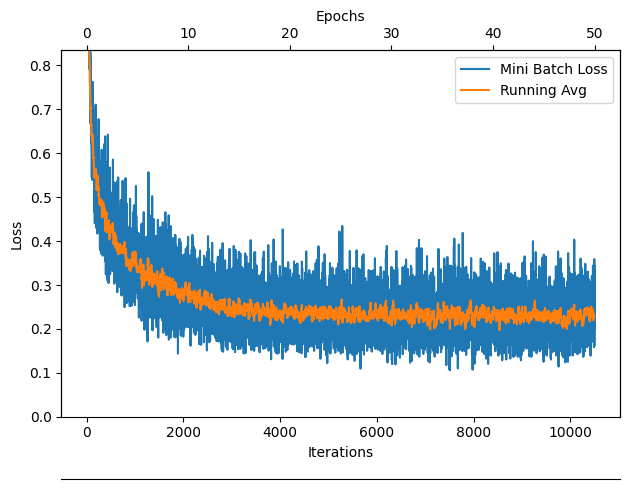

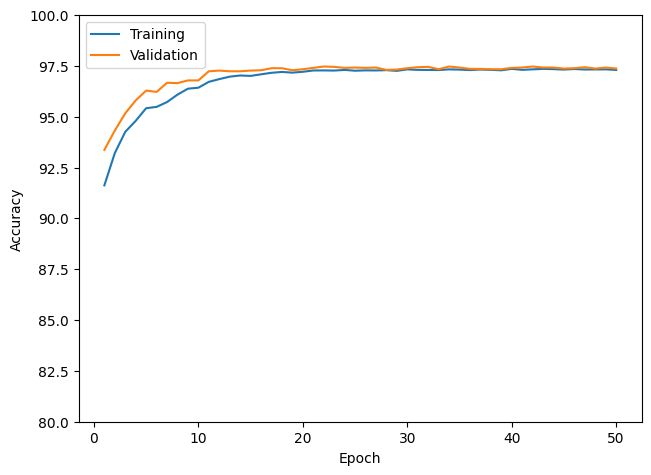

In [12]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()